# Question 1

$$
\frac{dy(x)}{dx} = y'(x) = -50(y - \cos(x))
$$

# 1.1 \& 1.2

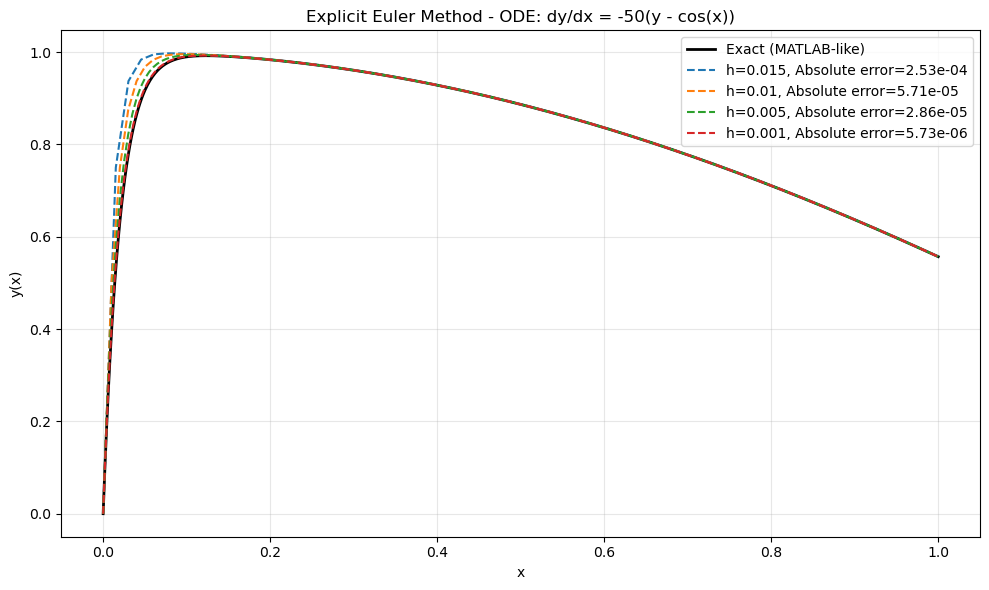


Explicit Euler Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   2.5257e-04
    0.0100   |   5.7061e-05
    0.0050   |   2.8597e-05
    0.0010   |   5.7302e-06



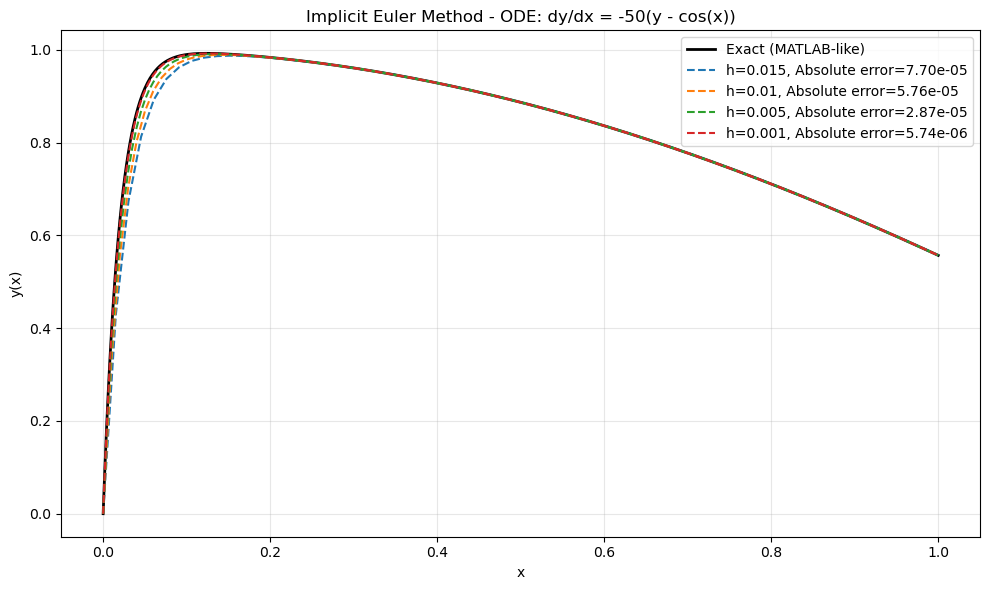


Implicit Euler Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   7.6998e-05
    0.0100   |   5.7595e-05
    0.0050   |   2.8731e-05
    0.0010   |   5.7355e-06



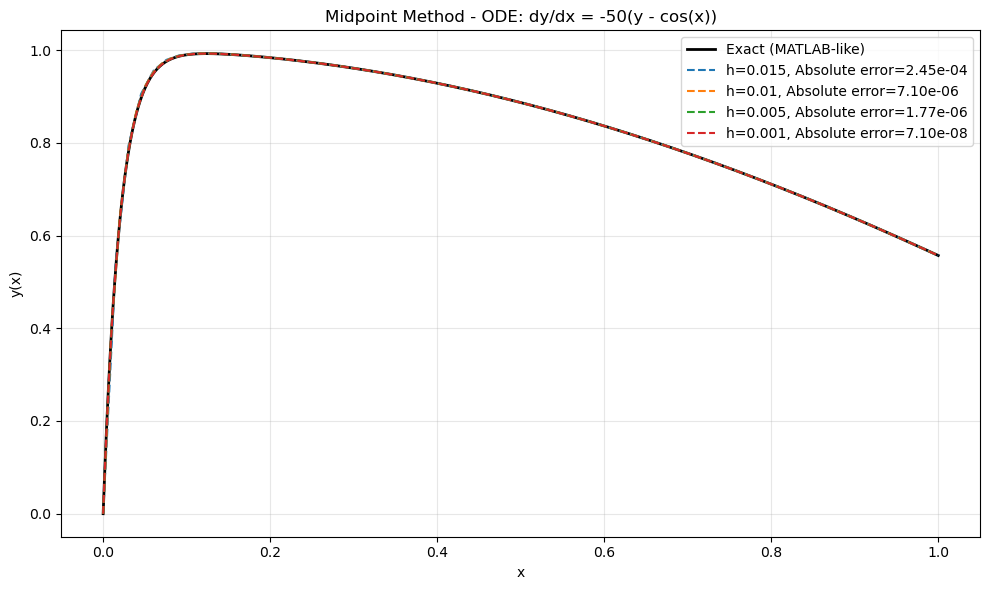


Midpoint Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   2.4460e-04
    0.0100   |   7.0979e-06
    0.0050   |   1.7745e-06
    0.0010   |   7.0979e-08



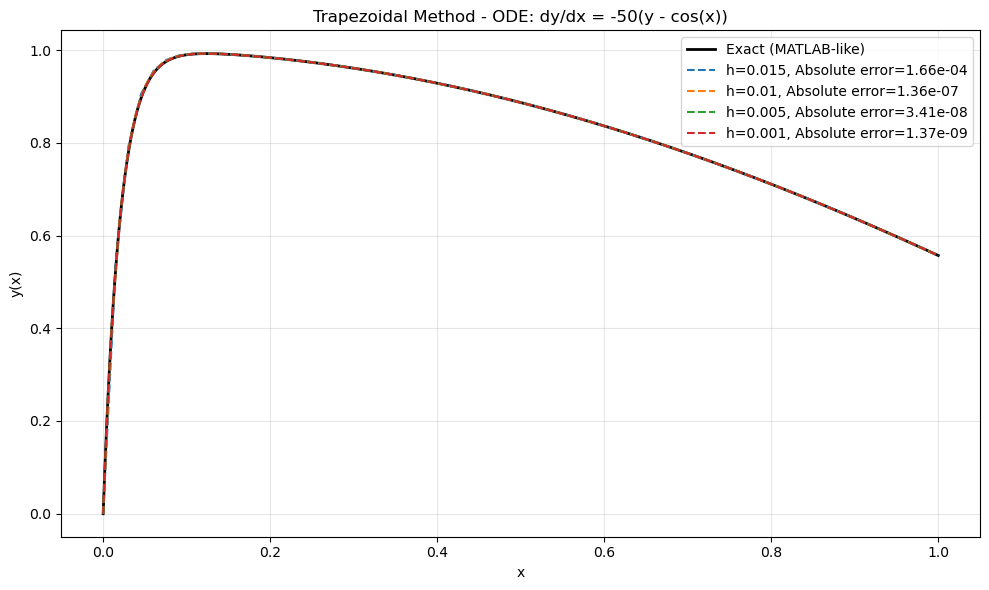


Trapezoidal Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   1.6572e-04
    0.0100   |   1.3648e-07
    0.0050   |   3.4120e-08
    0.0010   |   1.3651e-09



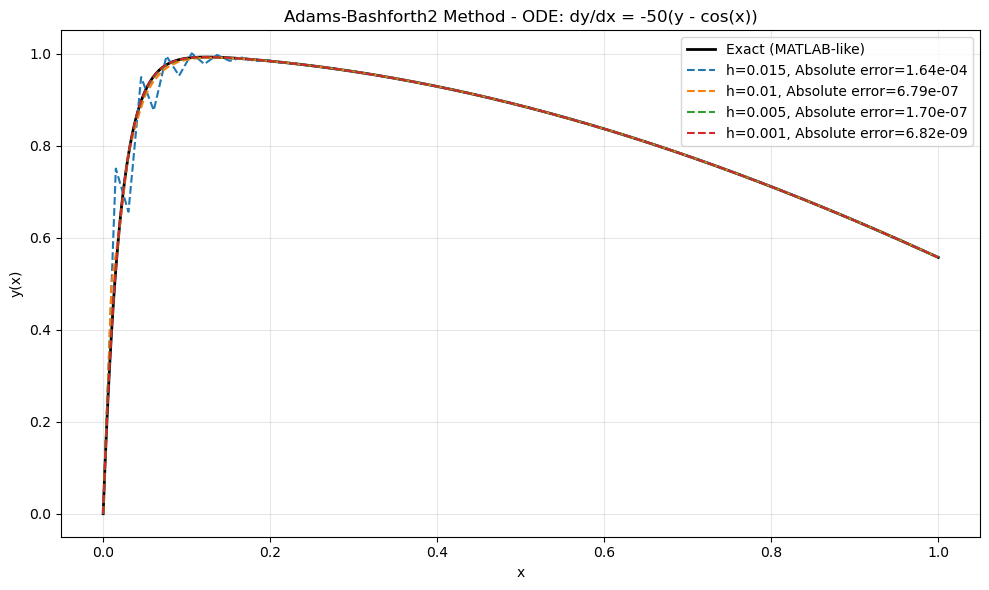


Adams-Bashforth2 Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   1.6383e-04
    0.0100   |   6.7948e-07
    0.0050   |   1.7024e-07
    0.0010   |   6.8207e-09



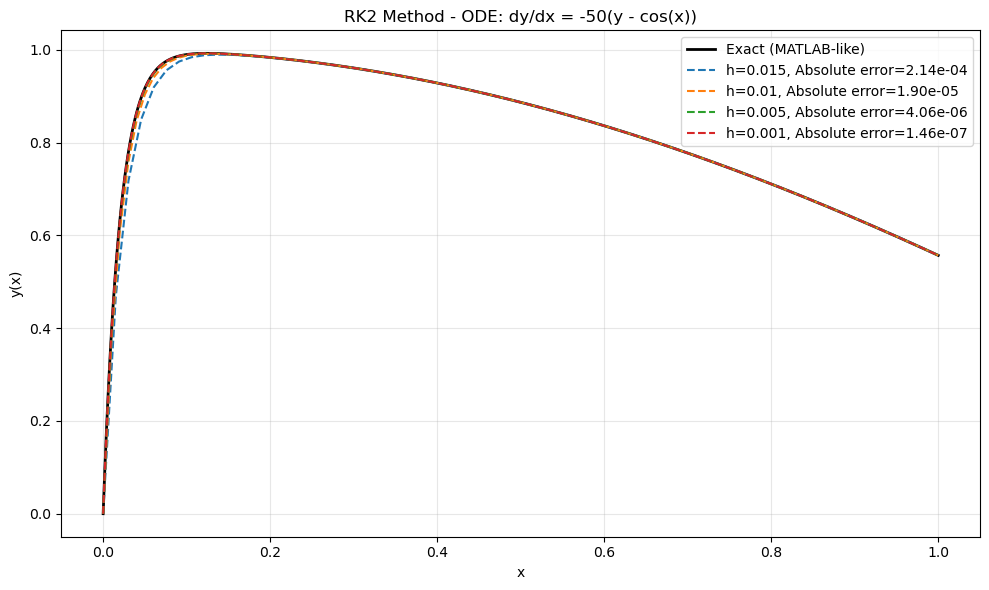


RK2 Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   2.1353e-04
    0.0100   |   1.9018e-05
    0.0050   |   4.0629e-06
    0.0010   |   1.4563e-07



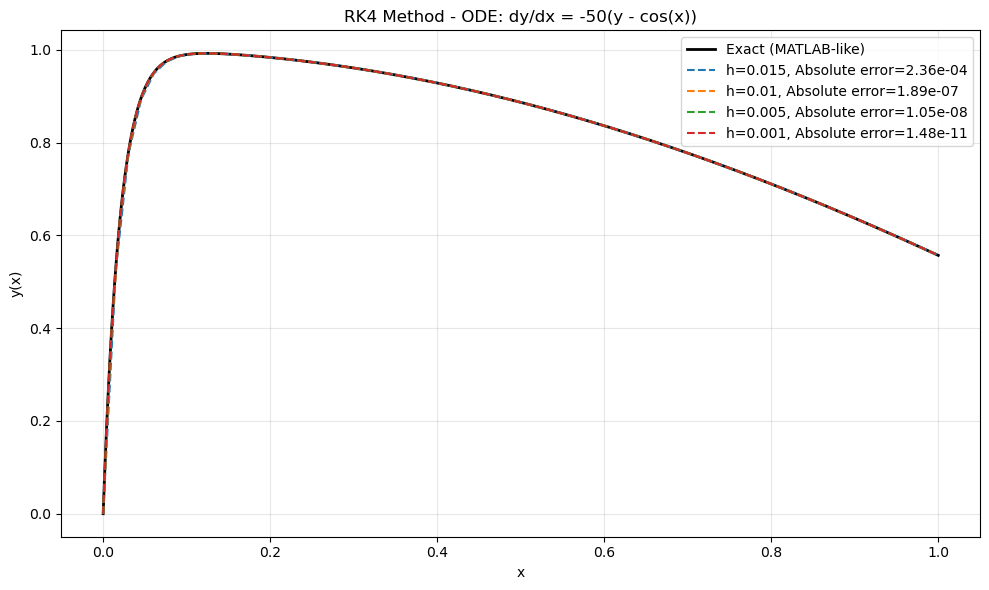


RK4 Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   2.3588e-04
    0.0100   |   1.8903e-07
    0.0050   |   1.0471e-08
    0.0010   |   1.4799e-11



Text(0.5, 0, 'Inverse step size (1/h)')

<Figure size 1400x1200 with 0 Axes>

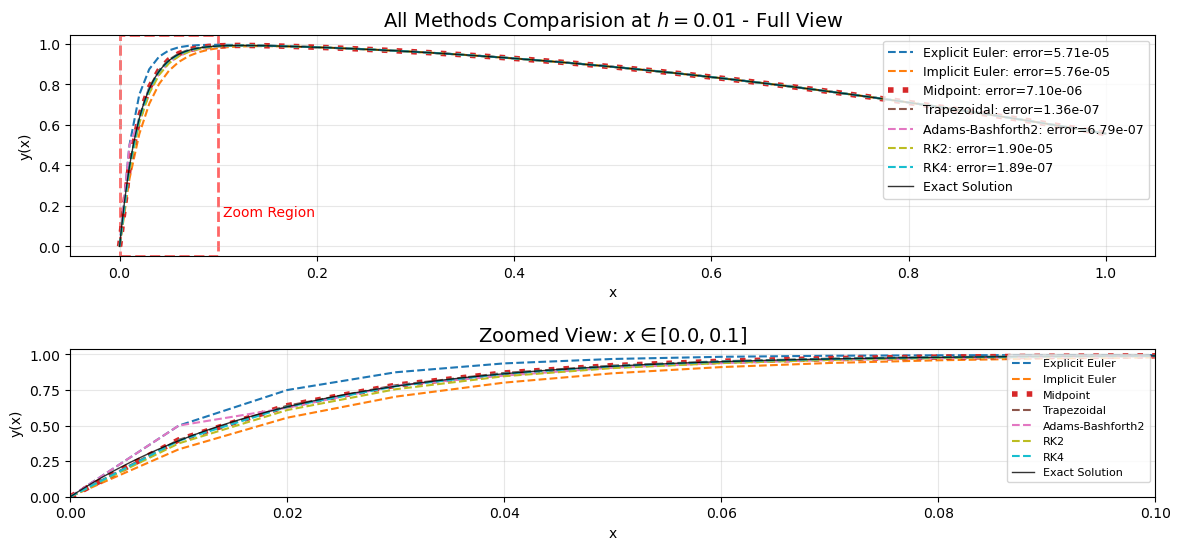

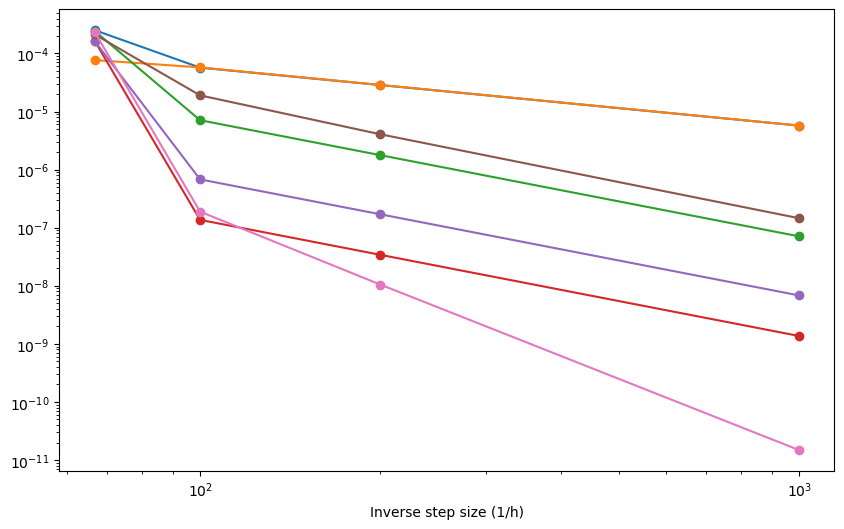

In [ ]:
import numpy as np, matplotlib.pyplot as plt, os

from true import *
from solvers.euler_explicit import *
from solvers.euler_implicit import *
from solvers.midpoint import *
from solvers.trapezoidal import *
from solvers.ab_2 import *
from solvers.rk_2 import *
from solvers.rk_4 import *

# Define the ODE
def f(x, y):
    return -50 * (y- np.cos(x))

# Parameters
y0 = 0
x_range = [0, 1]

# Get exact solution
sol_exact = exact_solution(f)
x_exact = np.linspace(0, 1, 1000)
y_exact = sol_exact.sol(x_exact)[0]

# Define step sizes to test
step_sizes = [0.015, 0.01, 0.005, 0.001]

# Dictionary of methods
methods = {
    'Explicit Euler': explicit_euler,
    'Implicit Euler': implicit_euler,
    'Midpoint': midpoint, # implicit_midpoint,ss
    'Trapezoidal': trapezoidal,
    'Adams-Bashforth2': adams_bashforth2,
    'RK2': rk2,
    'RK4': rk4
}

# Plot each method separately with different step sizes
for method_name, method_func in methods.items():
    plt.figure(figsize=(10, 6))
    
    # Plot exact solution
    plt.plot(x_exact, y_exact, 'k-', linewidth=2, label='Exact (MATLAB-like)')
    
    # Plot numerical solutions for different step sizes
    for i, h in enumerate(step_sizes):
        x_num, y_num, n_evals = method_func(f, y0, x_range, h, return_evals=True)
        
        # Interpolate exact solution to numerical grid for error calculation
        y_exact_interp = sol_exact.sol(x_num)[0]
        error = compute_error(y_num, y_exact_interp)
        
        plt.plot(x_num, y_num, '--', linewidth=1.5, 
                label=f'h={h}, Absolute error={error:.2e}')
    
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title(f'{method_name} Method - ODE: dy/dx = -50(y - cos(x))')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    os.makedirs('solo_method', exist_ok=True)
    plt.savefig(f'solo_method/{method_name.replace(" ", "_")}_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Print errors table
    print(f"\n{method_name} Errors:")
    print("-" * 40)
    print("Step size h | Relative L2 Error")
    print("-" * 40)
    for h in step_sizes:
        x_num, y_num = method_func(f, y0, x_range, h)
        y_exact_interp = sol_exact.sol(x_num)[0]
        error = compute_error(y_num, y_exact_interp)
        print(f"    {h:6.4f}   |   {error:.4e}")
    print()

# All methods comparison on a single plot with split view
h_static = 0.01
plt.figure(figsize=(14, 12))

# Create main plot (top) and zoomed plot (bottom)
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), height_ratios=[2, 1, 1])
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), height_ratios=[3, 2])
plt.subplots_adjust(hspace=0.5) 

# Define color cycle for better visibility
colors = plt.cm.tab10(np.linspace(0, 1, len(methods)))
color_dict = {name: color for name, color in zip(methods.keys(), colors)}

# Plot all methods on both axes
for idx, (method_name, method_func) in enumerate(methods.items()):
    style, linewidth = '--', 1.5

    x_num, y_num = method_func(f, y0, x_range, h_static)
    y_exact_interp = sol_exact.sol(x_num)[0]
    error = compute_error(y_num, y_exact_interp)
    if method_name == 'Midpoint':
        style,linewidth= 'dotted', 4.0
    # Main plot (full range)
    ax1.plot(x_num, y_num, linestyle = style, linewidth=linewidth, color=color_dict[method_name],
             label=f'{method_name}: error={error:.2e}')
    
    # Zoomed plot
    ax2.plot(x_num, y_num, linestyle = style, linewidth=linewidth, color=color_dict[method_name],
             label=f'{method_name}')
    # ax3.plot(x_num, y_num, linestyle = style, linewidth=linewidth, color=color_dict[method_name],
            #  label=f'{method_name}')
# Plot exact solution
ax1.plot(x_exact, y_exact, 'k-', linewidth=1, label='Exact Solution', alpha=0.8)
ax2.plot(x_exact, y_exact, 'k-', linewidth=1, label='Exact Solution', alpha=0.8)
# ax3.plot(x_exact, y_exact, 'k-', linewidth=1, label='Exact Solution', alpha=0.8)

# Customize main plot
ax1.set_xlabel('x')
ax1.set_ylabel('y(x)')
ax1.set_title(rf'All Methods Comparision at $h={h_static}$ - Full View', fontsize=14)
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Customize zoomed plot (focus on region where lines overlap, e.g., x=[0.9, 1.0])
zoom_x_min, zoom_x_max = 0.0, 0.1
ax2.set_xlim(zoom_x_min, zoom_x_max)
# Auto-adjust y-limits based on data in zoomed region
zoom_idx = (x_exact >= zoom_x_min) & (x_exact <= zoom_x_max)
zoom_y_min = y_exact[zoom_idx].min() * 0.95
zoom_y_max = y_exact[zoom_idx].max() * 1.05
ax2.set_ylim(zoom_y_min, zoom_y_max)

ax2.set_xlabel('x')
ax2.set_ylabel('y(x)')
ax2.set_title(rf'Zoomed View: $x \in [{zoom_x_min}, {zoom_x_max}]$', fontsize=14)
ax2.legend(loc='upper right', fontsize=8)
ax2.grid(True, alpha=0.3)

import matplotlib.patches as patches
rect = patches.Rectangle((zoom_x_min, ax1.get_ylim()[0]), 
                         zoom_x_max - zoom_x_min, 
                         ax1.get_ylim()[1] - ax1.get_ylim()[0],
                         linewidth=2, edgecolor='red', facecolor='none', 
                         linestyle='--', alpha=0.6)
ax1.add_patch(rect)
ax1.text(zoom_x_max + 0.005, ax1.get_ylim()[0] + 0.2, 'Zoom Region', 
         color='red', fontsize=10)


# Convergence study plot
plt.figure(figsize=(10, 6))

plot_data = {}
for method_name, method_func in methods.items():
    errors = []
    for h in step_sizes:
        x_num, y_num = method_func(f, y0, x_range, h)
        y_exact_interp = sol_exact.sol(x_num)[0]
        error = compute_error(y_num, y_exact_interp)
        errors.append(error)
    x_vals = 1/np.array(step_sizes[::-1])
    y_vals = errors[::-1]
    plot_data[method_name] = (x_vals, y_vals)
    plt.plot(x_vals, y_vals, 'o-', label=method_name)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Inverse step size (1/h)') 

# 1.3

In [17]:
expected_order = {
    "Explicit Euler": 1,
    "Implicit Euler": 1,
    "Midpoint": 2,
    "Trapezoidal": 2,
    "Adams-Bashforth2": 2,
    "RK2": 2,
    "RK4": 4,
}

for method, (inv_h, errors) in plot_data.items():
    h = 1.0 / np.array(inv_h)
    E = np.array(errors)

    # log–log fit
    alpha, logC = np.polyfit(np.log(h), np.log(E), 1)
    alpha_exp = expected_order.get(method, None)

    if alpha_exp is not None:
        print(f"{method:20s}: alpha ≈ {alpha:.2f} (expected {alpha_exp})")
    else:
        print(f"{method:20s}: alpha ≈ {alpha:.2f}")


Explicit Euler      : alpha ≈ 3.84 (expected 1)
Implicit Euler      : alpha ≈ 0.95 (expected 1)
Midpoint            : alpha ≈ 2.10 (expected 2)
Trapezoidal         : alpha ≈ 3.53 (expected 2)
Adams-Bashforth2    : alpha ≈ 9.39 (expected 2)
RK2                 : alpha ≈ 6.40 (expected 2)
RK4                 : alpha ≈ 9.41 (expected 4)
